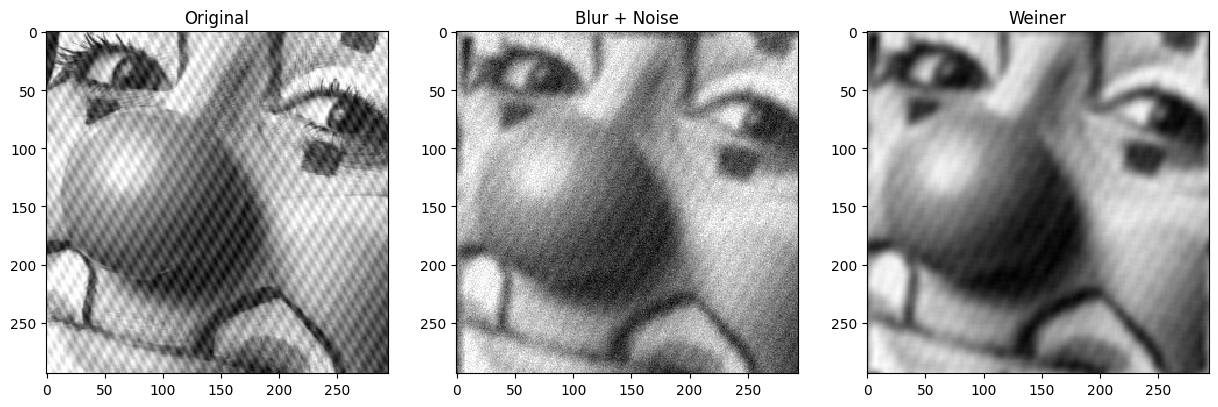

=== Mean Squared Error (MSE) ===
  MSE:  6585.106041


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('clown.jpg',cv2.IMREAD_GRAYSCALE)

f = image
w = image.shape[0]

n = 9
h = np.ones((n, n)) / (n**2) #kernel

# fft
F = np.fft.fft2(f)
H = np.fft.fft2(h, s=(w, w))
G = np.multiply(F, H) #blur

g = np.fft.ifft2(G)
g += np.random.normal(loc=0, scale=15, size=(g.shape[0],g.shape[1])) #Gaussian noise
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if g[i,j] > 255:
            g[i,j] = 255
        elif g[i,j] < 0:
            g[i,j] = 0
G = np.fft.fft2(g)


a = 1 #si aumento tengo menos ruido pero mas blur
W = np.conj(H) / (np.abs(H) ** 2 + a) #Weiner

Fp = np.multiply(G, W)
img_fp = np.abs(np.fft.ifft2(Fp))

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(f, interpolation='none', cmap = 'gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(np.abs(np.fft.ifft2(G)), interpolation='none', cmap = 'gray')
plt.title('Blur + Noise')
plt.subplot(133)
plt.imshow(img_fp, interpolation='none', cmap = 'gray')
plt.title('Weiner')
plt.show()

def mse(original, restored):
    return np.mean((original - restored) ** 2)

mseimg = mse(image,img_fp)
print("=== Mean Squared Error (MSE) ===")
print(f"  MSE:  {mseimg:.6f}")